In [9]:
# Dependencies and Setup
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_file = "Resources/mouse_drug_data.csv"
clinical_trial_file = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_file)
clinical_df=pd.read_csv(clinical_trial_file)

# Combine the data into a single dataset
mouse_clinical_df=pd.merge(mouse_df,clinical_df,on ="Mouse ID",how="left")
# Display the data table for preview
mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
ave_tumor_vol=mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
ave_tumor_df=pd.DataFrame(ave_tumor_vol)
# Preview DataFrame
ave_tumor_df=ave_tumor_df.reset_index(drop=False)
ave_tumor_df=ave_tumor_df.rename(columns={"Tumor Volume (mm3)":"Ave Tumor Vol"})
ave_tumor_df.head(2)

,Drug,Timepoint,Ave Tumor Vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol =mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_df =pd.DataFrame(sem_tumor_vol)
# Preview DataFrame
sem_tumor_df=sem_tumor_df.reset_index(drop=False)
sem_tumor_df=sem_tumor_df.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Vol"})
sem_tumor_df.head(2)

,Drug,Timepoint,SEM Tumor Vol
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593


In [5]:
#count for reformat of all data
drug_list=ave_tumor_df["Drug"].unique()
time_list=ave_tumor_df["Timepoint"].unique()


In [7]:
# Minor Data Munging to Re-Format the AVERAGE TUMOR VOL Data Frames
new_tumor_ave=pd.DataFrame(index=time_list,columns=drug_list) #add index/column to dataframe
for drug in drug_list:
    new_tumor_ave[drug]=ave_tumor_df["Ave Tumor Vol"].loc[ave_tumor_df["Drug"]==drug].values

new_tumor_ave.head(2)   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [10]:
# Minor Data Munging to Re-Format the TUMOR VOL SEM Data Frames
new_tumor_sem=pd.DataFrame(index=time_list,columns=drug_list)
for drug in drug_list:
    new_tumor_sem[drug]=sem_tumor_df["SEM Tumor Vol"].loc[sem_tumor_df["Drug"]==drug].values

new_tumor_sem.head()   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


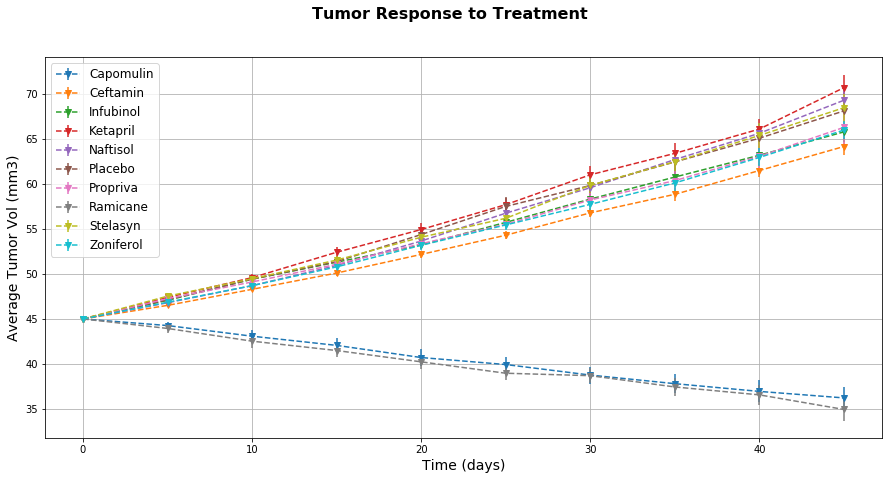

In [38]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize=(15,7))

fig.suptitle("Tumor Response to Treatment",fontsize=16,fontweight="bold")
for drug in drug_list:
    ax.errorbar(time_list,new_tumor_ave[drug],yerr=new_tumor_sem[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Average Tumor Vol (mm3)",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)
# Save the Figure
fig.savefig("TumorResponse.png")

In [18]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ave_met_site=mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
ave_met_site_df=pd.DataFrame(ave_met_site)
ave_met_site_df=ave_met_site_df.reset_index(drop=False)
ave_met_site_df=ave_met_site_df.rename(columns={"Metastatic Sites":"Ave Met Sites"})
#preview dataframe
ave_met_site_df.head(2)

,Drug,Timepoint,Ave Met Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_met_site =mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
sem_met_site_df =pd.DataFrame(sem_met_site)
# Preview DataFrame
sem_met_site_df=sem_met_site_df.reset_index(drop=False)
sem_met_site_df=sem_met_site_df.rename(columns={"Metastatic Sites":"SEM Met Sites"})
sem_met_site_df.head(2)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833


In [15]:
# Minor Data Munging to Re-Format Mean Met. Site Data Frames
new_met_site_ave=pd.DataFrame(index=time_list,columns=drug_list) #add index/column to dataframe
for drug in drug_list:
    new_met_site_ave[drug]=ave_met_site_df["Ave Met Sites"].loc[ave_tumor_df["Drug"]==drug].values

# Preview that Reformatting worked
new_met_site_ave.head(2)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [16]:
# Minor Data Munging to Re-Format SEM Met. Site Data Frames
new_met_site_sem=pd.DataFrame(index=time_list,columns=drug_list) #add index/column to dataframe
for drug in drug_list:
    new_met_site_sem[drug]=sem_met_site_df["SEM Met Sites"].loc[sem_met_site_df["Drug"]==drug].values

new_met_site_sem.head(2)   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


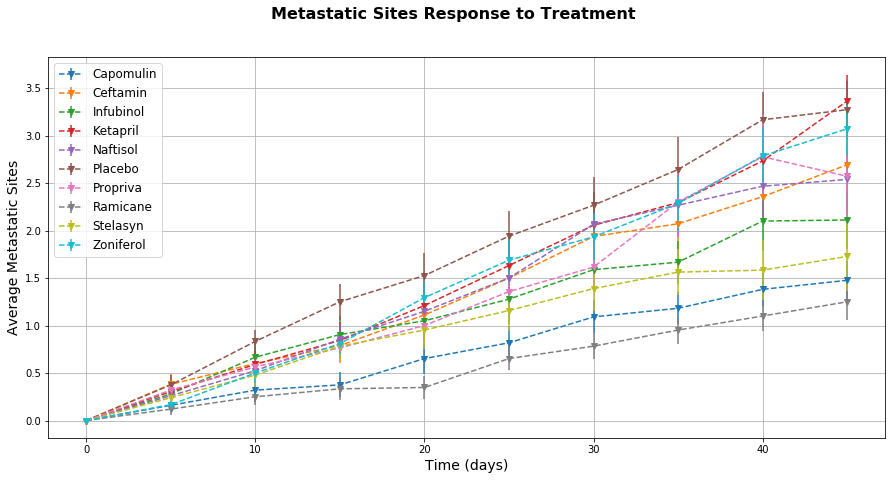

In [39]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize=(15,7))
fig.suptitle("Metastatic Sites Response to Treatment",fontsize=16,fontweight="bold")
for drug in drug_list:
    ax.errorbar(time_list,new_met_site_ave[drug],yerr=new_met_site_sem[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Average Metastatic Sites",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)  
# Save the Figure
fig.savefig("MetastaticResponse.png")
# Show the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=mouse_clinical_df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
mouse_count_df=pd.DataFrame(mouse_count)
mouse_count_df=mouse_count_df.reset_index(drop=False)
mouse_count_df=mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
new_mouse_count=pd.DataFrame(index=time_list,columns=drug_list)
for drug in drug_list:
    new_mouse_count[drug]=mouse_count_df["Mouse Count"].loc[mouse_count_df["Drug"]==drug].values
# Preview the Data Frame
new_mouse_count.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


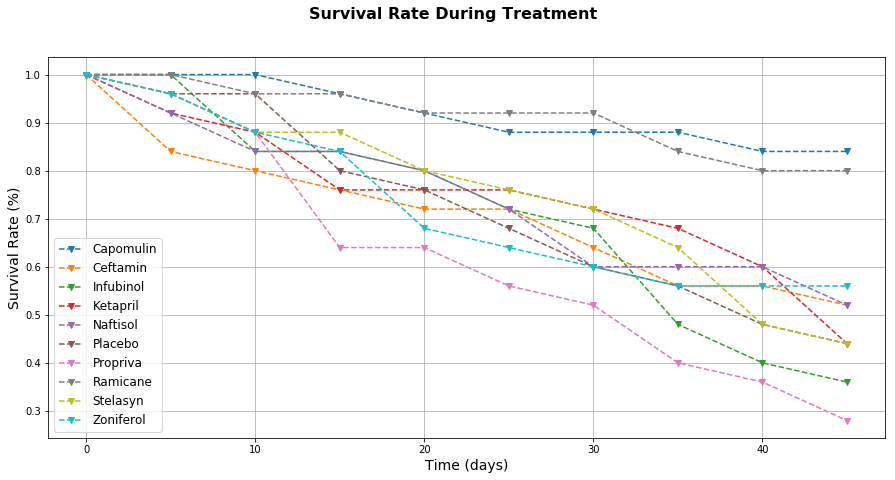

In [40]:
# Generate the Plot (Accounting for percentages)
mouse_percent=new_mouse_count /25
fig,ax=plt.subplots(figsize=(15,7))
fig.suptitle("Survival Rate During Treatment",fontsize=16, fontweight="bold")

for drug in drug_list:
    ax.plot(time_list,mouse_percent[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Survival Rate (%)",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)  
# Save the Figure
fig.savefig("SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [49]:
# Calculate the percent changes for each drug
percent_change=((new_tumor_ave.iloc[len(drug_list)-1,:] -new_tumor_ave.iloc[0,:])/new_tumor_ave.iloc[0,:])*100
# Display the data to confirm
percent_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()